In [16]:
import numpy
import csv
import os
from PIL import Image
from helpers import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preprocessing

In [17]:
# 이미지 size 변경 및 gray scaling

path = 'members_eyes'                                                       # 변환된 이미지를 저장할 경로
original_path = 'eyes'                                                      # 원본 이미지 경로

files = os.listdir(original_path)                                           # 경로에 저장되어있는 파일명의 list
image_list =[]                                                              # 변환된 이미지를 저장할 list

format = [".jpg",".png",".jpeg","bmp",".JPG",".PNG","JPEG","BMP"]           # 사용될 수 있는 이미지 파일의 형식
for file in files:
    if file.endswith(tuple(format)):                                        # 파일명의 끝부분(확장자)가 format list에 포함된 형식중 하나라면
        image = Image.open(original_path+"/"+file)                          # 이미지 파일을 open
        image = image.convert('L')                                          # image gray scaling
        image = image.resize((int(34), int(26)))                            # image size 변경 ( width(34) * height(26) )
        image.save(path+"/"+file)                                           # image save

In [18]:
# 이미지를 string으로 변환해 저장

file_lst = os.listdir(path)                                                 # 경로에 저장된 변환된 파일명의 list

with open('data/testData.csv', 'w+', newline='', encoding='Ascii') as f:
    csv.register_dialect('custom_dialet', delimiter='\n')                   # csv의 구분자를 default값인 , 에서 \n으로 변경
    for file in file_lst:
        image = Image.open(path + '/' + file)                               # 이미지 파일을 open
        width, height = image.size                                          # 이미지의 size 정보 저장

        img_str_list = []                                                   # 이미지를 문자열로 변환해 저장할 list
        pix = image.load()                                                  # 이미지의 픽셀값 가져옴
        img_str = ""
        img_str += '['
        for x in range(width):
            for y in range(height):
                img_str += (str(pix[x, y]) + ', ')
        img_str = img_str[:-2]
        img_str += ']'
        img_str_list.append(img_str)                                        # 이미지를 데이터 셋의 형태에 맞게 문자열로 변환해 img_str_list에 추가

        writer = csv.writer(f)
        fieldnames = ['state', 'image']
        writer = csv.DictWriter(f, fieldnames=fieldnames)

        for row in img_str_list:
            writer.writerow({"image":row})                                  # csv 파일에 write


In [19]:
# csv에 저장된 데이터 load

base_path = 'data'                                                           # dataset의 저장경로

X, y = read_csv(os.path.join(base_path, 'dataset.csv'))                      # helpers.py의 read_csv 함수를 호출해 data와 label을 불러옴

print(y)
print(X.shape, y.shape)

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
(2942, 26, 34, 1) (2942, 1)


## Preview

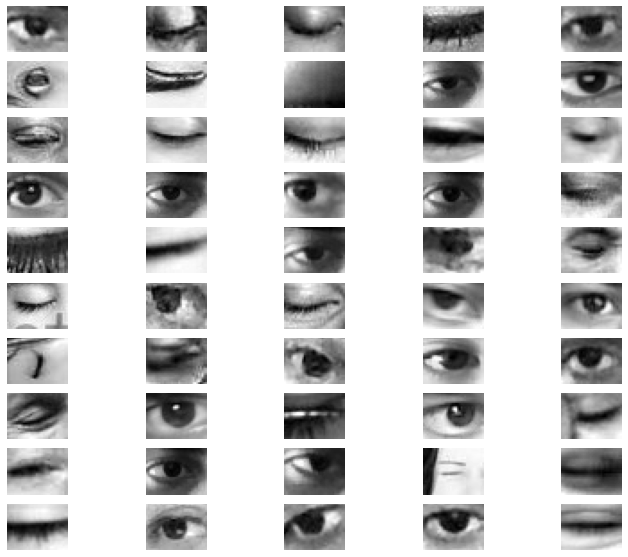

In [20]:
plt.figure(figsize=(12, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.axis('off')
    plt.imshow(X[i+2891].reshape((26, 34)), cmap='gray')

<AxesSubplot:>

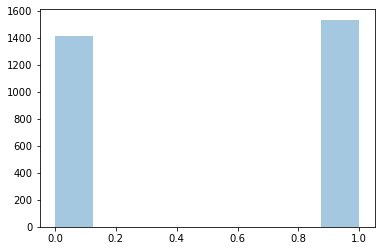

In [21]:
sns.distplot(y, kde=False)

## Train - Test Split

In [22]:
# load한 데이터를 training data와 validation data로 나눠 저장

n_total = len(X)                                                             # data의 수
X_result = np.empty((n_total, 26, 34, 1))                                    # 데이터를 저장하기 위한 빈 array 생성

for i, x in enumerate(X):
    img = x.reshape((26, 34, 1))                                             # 불려온 픽셀값 데이터를 34 * 24의 형태로 변경
    X_result[i] = img                                                        # 만들어둔 array에 데이터 저장


x_train, x_val, y_train, y_val = train_test_split(X_result, y, test_size=0.1)# dataset을 training data와 validation data로 split

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

# split한 데이터를 npy파일로 저장
np.save('../data/x_train.npy', x_train)
np.save('../data/y_train.npy', y_train)
np.save('../data/x_val.npy', x_val)
np.save('../data/y_val.npy', y_val)

(2647, 26, 34, 1) (2647, 1)
(295, 26, 34, 1) (295, 1)


FileNotFoundError: [Errno 2] No such file or directory: '../data/x_train.npy'

## Preview

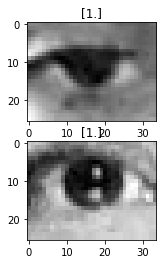

In [23]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[2646]))
plt.imshow(x_train[2646].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[290]))
plt.imshow(x_val[290].reshape((26, 34)), cmap='gray')

<AxesSubplot:>

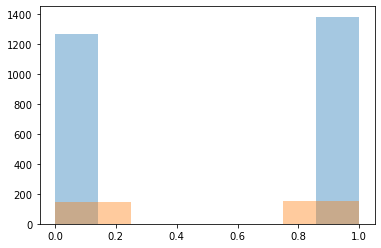

In [24]:
sns.distplot(y_train, kde=False)

sns.distplot(y_val, kde=False)